In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


import os


import cv2

In [2]:
# preprocess image
def preprocessImg(img, new_width=30, new_height=30): # if the size is too big, a memory overflow will occur when calculating covariance
    new_dim = (new_width, new_height)
    return cv2.resize(img, new_dim, interpolation=cv2.INTER_LINEAR)

In [3]:
def PCA(data, n_components=3):
    mean_vector = np.mean(data, axis=0) # calculate the mean of each column
    std_vector = np.std(data, axis=0) # calculate standard deviation of each column
    
    
    # normalize here
    centered_data = data - mean_vector # center data by subtracting mean
    standardized_data = centered_data / std_vector
    
    
    
    cov = np.cov(standardized_data.T) # caluculate covariance matrix of centered matrix (np.cov calculates covariance of rows, thus need transpose)
    eig_values, eig_vectors = np.linalg.eig(cov) # get eigenvalues and eigenvectors
    
    
    max_indexes = []
    for i in range(0, n_components):
        maxIndex = np.argmax(eig_values)
        max_indexes.append(maxIndex)
        eig_values[maxIndex] = 0
         
    # final_features = np.empty(0)
    final_features = eig_vectors[:, max_indexes]
   # print(len(final_features))
    
    projected_data = (np.dot(standardized_data, final_features))
    #projected_data = (np.dot(eig_vectors.T, cov.T)).T # return projected data matrix
    
    return projected_data

In [4]:
class K_means:
    
    def __init__(self, n_clusters=2, tol=0.0001, max_iter=300):
        self.n_clusters = n_clusters
        self.tol = tol
        self.max_iter = max_iter
        
    def fit(self, data, initial_centroids):
        self.centroids = {}
        for i in range(self.n_clusters):
            self.centroids[i] = data[initial_centroids[i]]

        for i in range(self.max_iter):
            self.classifications = {}
            
            for i in range(self.n_clusters):
                self.classifications[i] = []


            for datapoint in data:
                distances = [np.linalg.norm(datapoint - self.centroids[centroid]) for centroid in self.centroids]
                classification = distances.index(min(distances))
                self.classifications[classification].append(datapoint)

            prev_centroids = dict(self.centroids)

            for classification in self.classifications:
                self.centroids[classification] = np.average(self.classifications[classification], axis=0)

            optimized = True

            for c in self.centroids:
                original_centroid = prev_centroids[c]
                current_centroid = self.centroids[c]
                centroidMovement = np.sum((current_centroid - original_centroid) / original_centroid * 100.0)
                if centroidMovement > self.tol:
                    optimized = False

            if optimized:
                break
                
                
    def predict(self, datapoint):
        distances = [np.linalg.norm(datapoint - self.centroids[centroid]) for centroid in self.centroids]
        classification = distances.index(min(distances))
        return classification

Start to read red mango data(you need to do PCA by yourself)

In [5]:
imgSet = []

In [6]:
##############  your turn  , do PCA  ##############

#sklearn is not allow!! you need to implement  function step by step
##############  PCA  RULES   #################
###  for drawing 3D graph  , you should make dimension =3
### On calculating accuracy , you can set any dimension 
# hint ~ you can save the PCA result to the list ,train_red
path='./sum/green/'
files=os.listdir(path)

for file in files:
    
    p=path+file
    img = cv2.imread(p)

    resizedImg = preprocessImg(img)
    imgVector = resizedImg.flatten(order='C')
    imgSet.append(imgVector)
    
    


Start to read green mango data(you need to do PCA by yourself)

In [7]:
##############  your turn  , do PCA  ##############

#sklearn is not allow!! you need to implement kmeans function step by step
##############  PCA  RULES   #################

###  for drawing 3D graph  , you should make dimension =3
### On calculating accuracy , you can set any dimension 
# hint ~ you can save the PCA result to the list ,train_green


path='./sum/red/'
files=os.listdir(path)

for file in files:
    
    p=path+file
    img = cv2.imread(p)

    resizedImg = preprocessImg(img)
    imgVector = resizedImg.flatten(order='C')
    imgSet.append(imgVector)
    

    



In [8]:
imgSet = np.asarray(imgSet)

transformed_data = PCA(imgSet)
transformed_data = transformed_data.astype(float)
print(len(transformed_data))
print(len(transformed_data[0]))

72
3


<ipython-input-8-f9dd6cee6ebb>:4: ComplexWarning: Casting complex values to real discards the imaginary part
  transformed_data = transformed_data.astype(float)


show the PCA result 

this is the correct answer of your kmeans 


in the other words,your kmeans result need to as similar to this one as possible 

In [9]:
xx=[]
yy=[]
zz=[]
for i in range(36):
    xx.append(transformed_data[i][0])
    yy.append(transformed_data[i][1])
    zz.append(transformed_data[i][2])

In [10]:
xxx=[]
yyy=[]
zzz=[]
for i in range(36,72):
    xxx.append(transformed_data[i][0])
    yyy.append(transformed_data[i][1])
    zzz.append(transformed_data[i][2])

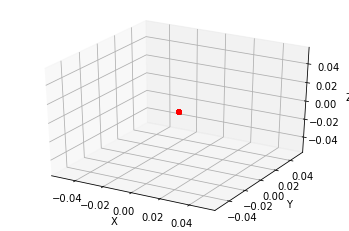

In [11]:
from mpl_toolkits.mplot3d import Axes3D



# x, y, z = data[0], data[1], data[2]
ax = plt.subplot(111, projection='3d')  

ax.scatter(xx, yy, zz, c='g')
ax.scatter(xxx, yyy, zzz, c='r')

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

start to do your kmeans!

In [12]:
#put all the mango data to total_train
#you need to cluster total_train
#Finally,your kmeans result should show which mango point is red mango or green mango

#1-36 is green data 
#37-72 is red data
#don't alter this order

#total_train=train_green+train_red

In [13]:
# pred=[]

In [14]:
init_centroids = [[a,b] for a in range(len(transformed_data)) for b in range(len(transformed_data))]
#Max_Accuracy = 0
max_yieldings = []

for initial_centroids in init_centroids:
    K_means_model = K_means()
    K_means_model.fit(transformed_data, [36, 3])
    class1 = []
    class2 = []
    pred = []
    
    for datapoint in transformed_data:
        if K_means_model.predict(datapoint) == 0: # is red
            class1.append(datapoint)
            pred.append(0)
        else:
            class2.append(datapoint)     # is green
            pred.append(1)
            
    del K_means_model
        

c:\users\yorkg\appdata\local\programs\python\python38\lib\site-packages\numpy\lib\function_base.py:393: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
c:\users\yorkg\appdata\local\programs\python\python38\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
<ipython-input-4-814836342b37>:35: RuntimeWarning: invalid value encountered in true_divide
  centroidMovement = np.sum((current_centroid - original_centroid) / original_centroid * 100.0)


In [15]:
print(pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


this is your kmeans result!

In [16]:
#you need to show me your kmeans result in 3D picture like the result in video !



In [17]:
rxx=[]
ryy=[]
rzz=[]
for i in class1:
    rxx.append(i[0])
    ryy.append(i[1])
    rzz.append(i[2])

In [18]:
rxxx=[]
ryyy=[]
rzzz=[]
for i in class2:
    rxxx.append(i[0])
    ryyy.append(i[1])
    rzzz.append(i[2])

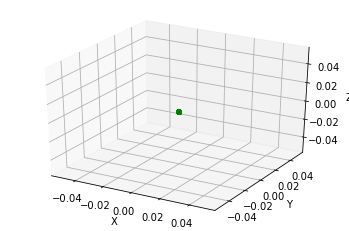

In [19]:
from mpl_toolkits.mplot3d import Axes3D


ax = plt.subplot(111, projection='3d') 

ax.scatter(rxx, ryy, rzz, c='g')
ax.scatter(rxxx, ryyy, rzzz, c='r')

ax.set_zlabel('Z')  
ax.set_ylabel('Y')
ax.set_xlabel('X')
plt.show()

Here is the code which calculate the accuracy of your kmeans result

In [20]:
#Do your best to improve accuracy.but don't cheat by looking answer and make pred by yourself 

In [21]:
# total_train have 72 mango data
#1~36 is green mango
#37~72 is red mango
#so the correct classification answer of  mango is  ans = [1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0]
#1 is green
#0 is red

In [22]:
# At here ! you need to show me your kmeans result in  the list  ,pred=[]
#for example,pred may be   pred=[0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
#in this case,the accuracy is 0.7  .  
#6 error , 14 correct  ,  14/20= 0.7 

In [23]:
print(pred)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [24]:
pred=np.array(pred)

In [25]:
correct=0
error=0
ans = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0])
for i in range(72):
    if ans[i]==pred[i]:
        correct+=1
    if ans[i]!=pred[i]:
        error+=1

In [26]:
accuracy=correct/72

In [27]:
accuracy

0.5

submit your pred=[......] to kaggle and look your rank